In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Upload all data being compared.

In [2]:
hpi=pd.read_csv('../data/hpi_2000-2020.csv')
zip0=pd.read_csv('../data/zip0.csv')
zip1=pd.read_csv('../data/zip1.csv')
zip2=pd.read_csv('../data/zip2.csv')
zip3=pd.read_csv('../data/zip3.csv')
zip4=pd.read_csv('../data/zip4.csv')
zip5=pd.read_csv('../data/zip5.csv')
zip6=pd.read_csv('../data/zip6.csv')
zip7=pd.read_csv('../data/zip7.csv')
zip8=pd.read_csv('../data/zip8.csv')
zip9=pd.read_csv('../data/zip9.csv')

2. Seperate HPI by single digit zip.

In [3]:
hpi_zip0=hpi[hpi['one-digit ZIP']==0]
hpi_zip1=hpi[hpi['one-digit ZIP']==1]
hpi_zip2=hpi[hpi['one-digit ZIP']==2]
hpi_zip3=hpi[hpi['one-digit ZIP']==3]
hpi_zip4=hpi[hpi['one-digit ZIP']==4]
hpi_zip5=hpi[hpi['one-digit ZIP']==5]
hpi_zip6=hpi[hpi['one-digit ZIP']==6]
hpi_zip7=hpi[hpi['one-digit ZIP']==7]
hpi_zip8=hpi[hpi['one-digit ZIP']==8]
hpi_zip9=hpi[hpi['one-digit ZIP']==9]

3. Merge data on matching zips.

In [4]:
zip0_hpi_merge = pd.merge(hpi_zip0,zip0,on='Year')
zip1_hpi_merge = pd.merge(hpi_zip1,zip1,on='Year')
zip2_hpi_merge = pd.merge(hpi_zip2,zip2,on='Year')
zip3_hpi_merge = pd.merge(hpi_zip3,zip3,on='Year')
zip4_hpi_merge = pd.merge(hpi_zip4,zip4,on='Year')
zip5_hpi_merge = pd.merge(hpi_zip5,zip5,on='Year')
zip6_hpi_merge = pd.merge(hpi_zip6,zip6,on='Year')
zip7_hpi_merge = pd.merge(hpi_zip7,zip7,on='Year')
zip8_hpi_merge = pd.merge(hpi_zip8,zip8,on='Year')
zip9_hpi_merge = pd.merge(hpi_zip9,zip9,on='Year')

4. Combine all data back to common dataframe.

In [5]:
ZIP_VS_HPI = pd.concat([zip0_hpi_merge,zip1_hpi_merge,zip2_hpi_merge,zip3_hpi_merge,zip4_hpi_merge,zip5_hpi_merge,zip6_hpi_merge,zip7_hpi_merge,zip8_hpi_merge,zip9_hpi_merge])

5. Rename columns for clarity. 

In [6]:
new_column_names = {'HPI':'1975 HPI base','Annual Change (%)':'Year by year HPI percent change','percent_change':'employment year by year percent change'}

In [7]:
ZIP_VS_HPI.rename(columns=new_column_names,inplace=True)

In [8]:
ZIP_VS_HPI = ZIP_VS_HPI.fillna(0)

In [9]:
ZIP_VS_HPI = ZIP_VS_HPI.drop(['1975 HPI base','Year by year HPI percent change'],axis=1)

6. Create pivot tables for use in graphs.

In [10]:
HPI_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='HPI with 2000 base', index='Year', columns='one-digit ZIP')
employment_percent_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment_by_thosands', index='Year', columns='one-digit ZIP')

7. Create some base visuals for possible use.

<AxesSubplot:xlabel='Year'>

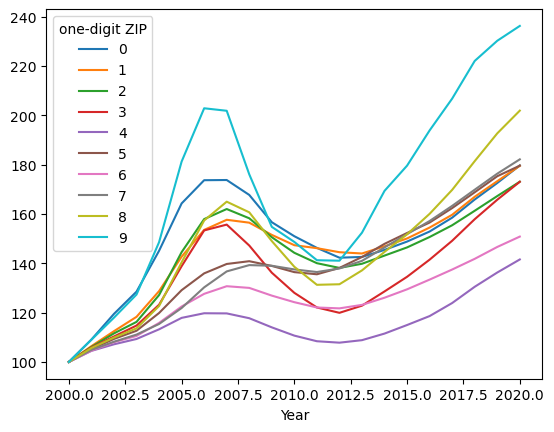

In [11]:
HPI_2000_pivot_table.plot(kind='line')

<AxesSubplot:xlabel='Year'>

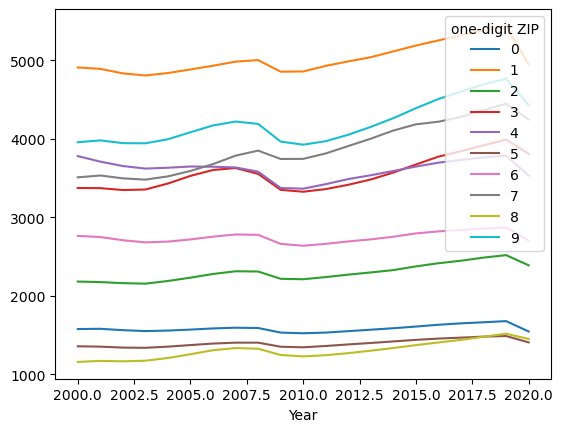

In [12]:
employment_percent_pivot_table.plot(kind='line')

In [13]:
HPI_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='Percent change since 2000', index='Year', columns='one-digit ZIP')

In [14]:
colors=['pink', 'dark yellow', 'dark blue', 'orange','light blue','purple','green','dark pink','yellow','blue']

<AxesSubplot:xlabel='Year'>

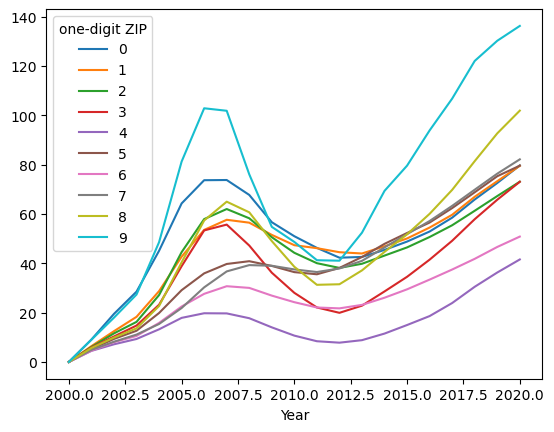

In [15]:
HPI_Percent_change_since_2000_pivot_table.plot(kind='line')

In [16]:
Employment_Percent_change_since_2000_pivot_table = pd.pivot_table(ZIP_VS_HPI, values='employment percent change since 2000', index='Year', columns='one-digit ZIP')

<AxesSubplot:xlabel='Year'>

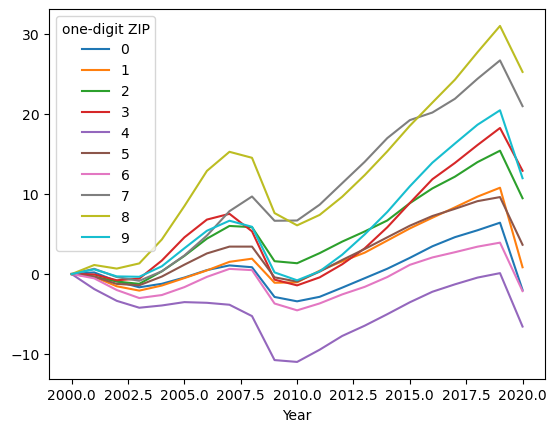

In [17]:
Employment_Percent_change_since_2000_pivot_table.plot(kind='line')

In [18]:
sum_of_employment_years_2000_2020 = ZIP_VS_HPI.groupby('Year')['employment_by_thosands'].sum().reset_index()

<AxesSubplot:xlabel='Year'>

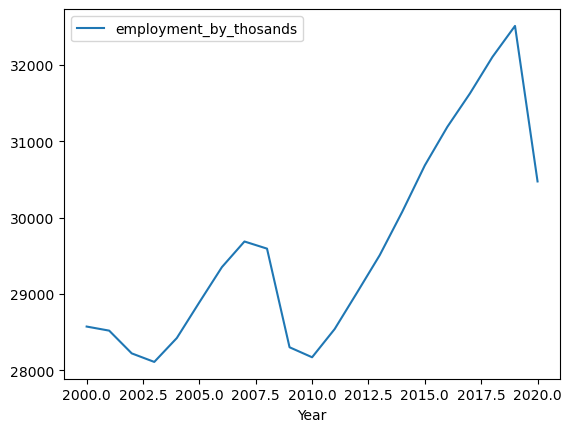

In [19]:
sum_of_employment_years_2000_2020.plot(x='Year',y='employment_by_thosands', kind='line')

8. Explore averages over the years being examined.

In [20]:
year2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']==2020]
years2010_2020 = ZIP_VS_HPI[ZIP_VS_HPI['Year']>=2010]
years2000_2010 = ZIP_VS_HPI[ZIP_VS_HPI['Year']<=2010]

In [21]:
years2000_2010['employment year by year percent change'].mean()

-0.07583171238471612

In [22]:
years2010_2020['employment year by year percent change'].mean()

0.6870299144842564

In [23]:
year2020['employment percent change since 2000'].mean()

7.445616678972295

In [24]:
ZIP_VS_HPI['employment year by year percent change'].mean()

0.3465122619820257

In [25]:
year2020['Percent change since 2000'].mean()

79.78939357049266

In [26]:
ZIP_VS_HPI

,one-digit ZIP,Year,HPI with 2000 base,Percent change since 2000,Percent change since 2010,HPI year by year percent change since 2000,employment_by_thosands,employment year by year percent change,employment percent change since 2000,employment percent change since 2010
0,0,2000,100.000000,0.000000,-33.770619,0.000000,1576.701190,0.000000,0.000000,3.531679
1,0,2001,109.081169,9.081169,-27.756217,9.081169,1579.947619,0.205900,0.205900,3.744850
2,0,2002,119.488961,19.488961,-20.863201,9.541328,1562.577381,-1.099419,-0.895782,2.604260
3,0,2003,128.511558,28.511558,-14.887591,7.550988,1550.591667,-0.767048,-1.655959,1.817237
4,0,2004,145.091299,45.091299,-3.906931,12.901361,1557.476190,0.443993,-1.219318,2.269298
...,...,...,...,...,...,...,...,...,...,...
16,9,2016,193.916591,93.916591,28.429757,7.955119,4509.011667,2.664083,13.921947,14.820819
17,9,2017,206.816705,106.816705,36.973423,6.652403,4603.766667,2.101458,16.315969,17.233731
18,9,2018,222.095568,122.095568,47.092519,7.387635,4696.645000,2.017442,18.662576,19.598854
19,9,2019,230.280000,130.280000,52.513018,3.685095,4768.461667,1.529106,20.477053,21.427647


9. Explore key differences between 2000-2010 and 2010-2020

In [27]:
years_comparison = ZIP_VS_HPI[(ZIP_VS_HPI['Year']==2010) | (ZIP_VS_HPI['Year']==2020)]

In [28]:
years_comparison = years_comparison[['one-digit ZIP','Year','Percent change since 2000','Percent change since 2010','employment percent change since 2000','employment percent change since 2010']]

In [29]:
years_comparison

,one-digit ZIP,Year,Percent change since 2000,Percent change since 2010,employment percent change since 2000,employment percent change since 2010
10,0,2010,50.990390,0.000000,-3.411206,0.000000
20,0,2020,79.710390,19.021078,-1.991424,1.469924
10,1,2010,47.346979,-2.413008,-1.034009,0.000000
20,1,2020,79.561979,18.922787,0.848759,1.902439
10,2,2010,44.264396,-4.454584,1.351687,0.000000
20,2,2020,73.111758,14.650845,9.477592,8.017533
10,3,2010,28.020222,-15.213000,-1.415171,0.000000
20,3,2020,73.066889,14.621129,12.913396,14.534252
10,4,2010,10.667634,-26.705511,-10.986730,0.000000
20,4,2020,41.566237,-6.241558,-6.564283,4.968302


In [46]:
ZIP_VS_HPI.corr()

,one-digit ZIP,Year,HPI with 2000 base,Percent change since 2000,Percent change since 2010,HPI year by year percent change since 2000,employment_by_thosands,employment year by year percent change,employment percent change since 2000,employment percent change since 2010
one-digit ZIP,1.000000e+00,1.094480e-14,0.101658,0.101658,0.101658,-0.001357,0.011770,0.111535,0.330918,0.107044
Year,1.094480e-14,1.000000e+00,0.656353,0.656353,0.656353,0.249691,0.087477,-0.004967,0.524622,0.670119
HPI with 2000 base,1.016582e-01,6.563535e-01,1.000000,1.000000,1.000000,0.325728,0.095176,-0.023697,0.654442,0.616605
Percent change since 2000,1.016582e-01,6.563535e-01,1.000000,1.000000,1.000000,0.325728,0.095176,-0.023697,0.654442,0.616605
Percent change since 2010,1.016582e-01,6.563535e-01,1.000000,1.000000,1.000000,0.325728,0.095176,-0.023697,0.654442,0.616605
HPI year by year percent change since 2000,-1.356890e-03,2.496905e-01,0.325728,0.325728,0.325728,1.000000,-0.000763,0.193940,0.188081,0.208569
employment_by_thosands,1.176987e-02,8.747699e-02,0.095176,0.095176,0.095176,-0.000763,1.000000,0.011309,0.019963,0.161549
employment year by year percent change,1.115351e-01,-4.967217e-03,-0.023697,-0.023697,-0.023697,0.193940,0.011309,1.000000,0.288126,0.214131
employment percent change since 2000,3.309176e-01,5.246217e-01,0.654442,0.654442,0.654442,0.188081,0.019963,0.288126,1.000000,0.724054
employment percent change since 2010,1.070443e-01,6.701195e-01,0.616605,0.616605,0.616605,0.208569,0.161549,0.214131,0.724054,1.000000


In [30]:
ZIP_VS_HPI.to_csv('../data/ZIP_VS_HPI.csv',index=False)

In [31]:
years_comparison.to_csv('../data/ten_years_comparason.csv',index=False)